In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

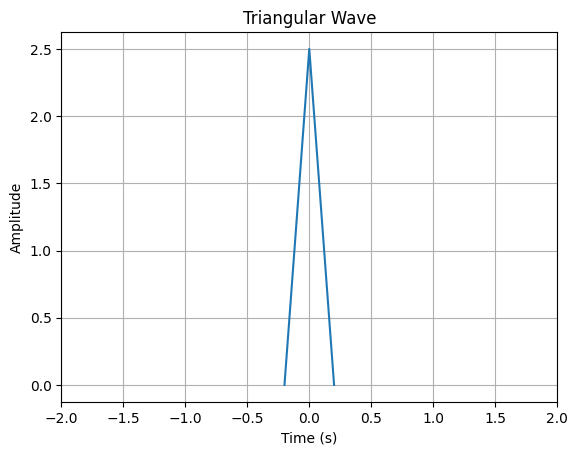

In [3]:
#R 
amp = 2.5 
b = 2
period = 0.4
x1 = np.linspace(-0.2, 0.0, 100) 
x2 = np.linspace(0.0, 0.2, 100)


def triangle_wave(amp, b, x, period, c):
    return ((c * (b * amp * x)) / period) + amp

triangle_sig1 = triangle_wave(amp, b, x1, period, 1)
triangle_sig2 = triangle_wave(amp, b, x2, period, -1)


xc = np.concatenate((x1, x2))
triangle_sig = np.concatenate((triangle_sig1, triangle_sig2))



plt.plot(xc, triangle_sig)
plt.title('Triangular Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.grid(True)
    



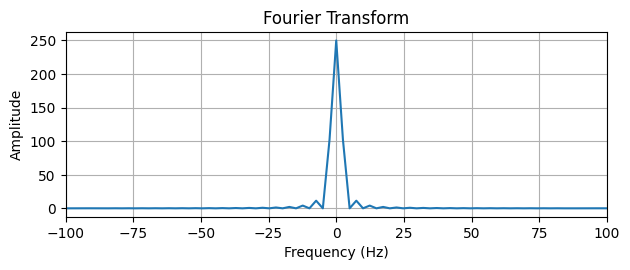

In [4]:
plt.subplot(2, 1, 2)
fft_result = np.fft.fft(triangle_sig)
fft_freqs = np.fft.fftfreq(len(triangle_sig), d=(xc[1] - xc[0]))
fft_result_shifted = np.fft.fftshift(fft_result)
fft_freqs_shifted = np.fft.fftshift(fft_freqs)
plt.plot(fft_freqs_shifted, np.abs(fft_result_shifted))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-100, 100) 
plt.tight_layout()
plt.show()

(400,)


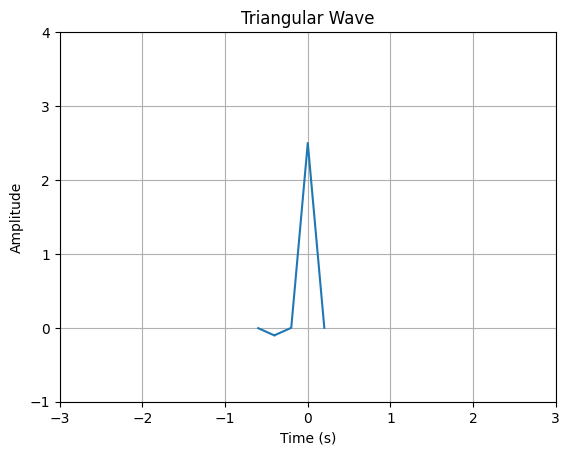

In [5]:
#Q 
amp = .1 
b = 2
period = 0.4
x1_q = np.linspace(-.6, -.4, 100) 
x2_q = np.linspace(-0.4, -0.2, 100)

def triangle_wave(amp, b, x, period, c, h):
    return (((c * (b * amp * (x+.25))) / period) + amp) - (h)

qtriangle_sig1 = triangle_wave(amp, b, x1_q, period, -1, .28)
qtriangle_sig2 = triangle_wave(amp, b, x2_q, period, 1, .125) 
q_xc = np.concatenate((x1_q, x2_q))

qtriangle_sig = np.concatenate((qtriangle_sig1, qtriangle_sig2))

newxc = np.concatenate((q_xc, xc))
qr_triangle_sig = np.concatenate((qtriangle_sig, triangle_sig))
print(newxc.shape)
plt.plot(newxc, qr_triangle_sig)
plt.title('Triangular Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-3,3)
plt.ylim(-1,4)
plt.grid(True)

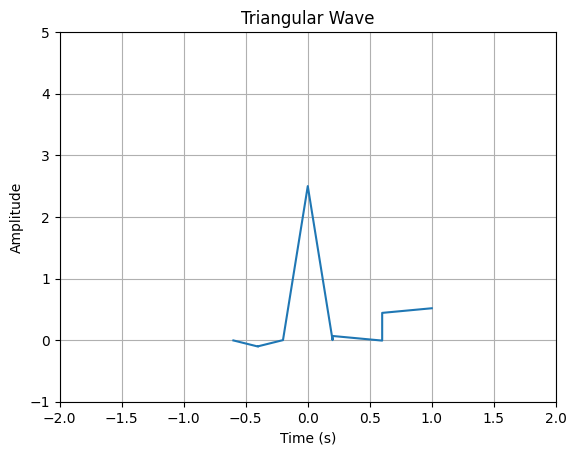

In [6]:
#S
amp = .075 
b = 2
period = 0.8
x1_s = np.linspace(0.2, 0.6, 100)
x2_s = np.linspace(.6, 1, 100) 


def triangle_wave(amp, b, x, period, c1, c2, c3):
    return (((c1 * (b * amp * (x-c3))) / period) + amp) - (c2)

striangle_sig1 = triangle_wave(amp, b, x1_s, period, -1, -.011, .1)
striangle_sig2 = triangle_wave(amp, b, x2_s, period, 1, -.011, -1.3) 

s_xc = np.concatenate((x1_s, x2_s))
striangle_sig = np.concatenate((striangle_sig1, striangle_sig2))

qrsxc = np.concatenate((newxc, s_xc))
qrs_triangle_sig = np.concatenate((qr_triangle_sig, striangle_sig))

plt.plot(qrsxc, qrs_triangle_sig)
plt.title('Triangular Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.ylim(-1,5)
plt.grid(True)

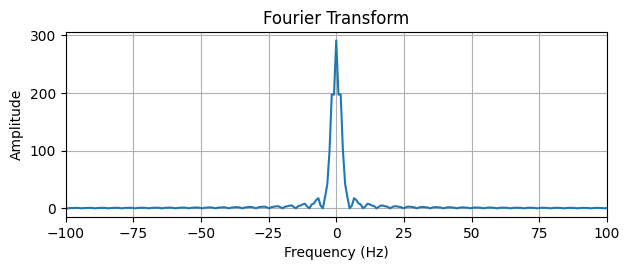

In [7]:
plt.subplot(2, 1, 2)
fft_result = np.fft.fft(qrs_triangle_sig)
fft_freqs = np.fft.fftfreq(len(qrs_triangle_sig), d=(qrsxc[1] - qrsxc[0]))
fft_result_shifted = np.fft.fftshift(fft_result)
fft_freqs_shifted = np.fft.fftshift(fft_freqs)
plt.plot(fft_freqs_shifted, np.abs(fft_result_shifted))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-100, 100) 
plt.tight_layout()
plt.show()

In [8]:
from scipy.integrate import quad
def r_wave(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*(x))/(period) + amp
        
    R_a0, _ = quad(a0, 0, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,0)
    R_a0 = 1/500*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1,0)
    c = -1
    R1_an = []
    R1_an = aN(0, p2)
    a_N = 1/500*(R_an+R1_an)
    return a_N, R_a0

def s_wave(n, b, amp, period, p1, p2, c2):
    
    f1 = lambda x : ((-1*b*amp*(x))/(period) + amp)
    f2 = lambda x : ((b*amp*(x+c2))/(period) + amp)
      
    R_a0, _ = quad(f1 ,20, 30)#p1, (p2/2)+(p1/2))
    R1_a0, _ = quad(f2 , 30, 40)#(p2/2)+(p1/2),p2)
    R_a0 = (1/500)*(R_a0+R1_a0)
    
    
    
    def aN(low, high, f):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f3 = lambda x : (f(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f3, low, high)
        return arr
    
    R1_an = aN(20,30, f1)#p1, (p2/2)+(p1/2))
    R_an = aN(30,40, f2)#(p2/2)+(p1/2),p2)

    
    a_N = (1/500)*(R_an+R1_an)
    return a_N, R_a0
    

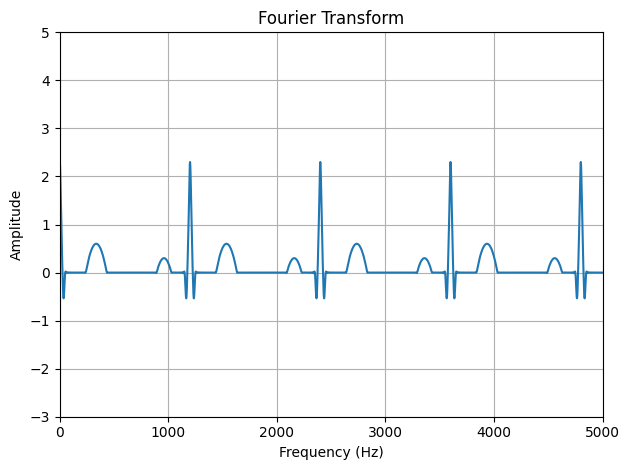

In [9]:
import random

def T_wave(n, low, high, amp, c1):
    def a0(x):
        return -0.00009375 * ((x + c1)**2) + amp
    T_a0, _ = quad(a0, a=low, b=high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (-9.375e-5 * ((x + c1)**2) + amp)*(np.cos((i*np.pi*x)/(500)))
            arr[i-1], _ = quad(f, a=low, b=high)
        return arr
    
    def bN():
        arr = np.zeros(n)
        for i in range(1, n + 1):
            f = lambda x: (-(9.375e-5 * (x + c1)**2) + amp) * np.sin((i * np.pi * x) / 500)
            arr[i - 1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/500)
    T_aN = aN()*(1/500)
    T_bN = bN()*(1/500)
    return T_aN, T_a0, T_bN


def fourier():
    
    #R-WAVE
    n, b, amp, p1, p2 = 60, 2, 2.5, -20, 20
    R_an, R_a0 = r_wave(n,b,amp, p1,p2)
    #Q_an, Q_a0 = coefficients(n, b, amp, 20, 40, -60)
    S_an, S_a0 = s_wave(n, b, amp, abs(p1)+abs(p2), 20, 40, -60)
    T_an, T_a0, T_bn = T_wave(n, 200, 360, .6,-280)
    P_an, P_a0, P_bn = T_wave(n, -260, -143, .3, 200)
    #R_an +=  Q_an + S_an  
    R_a0 +=  T_a0 + S_a0 + P_a0
    
    x = np.arange(0, 5000, 1)
    y = np.zeros(len(x))
    
    
    for j in range (len(x)):
        for i in range(1,n+1):
            y[j] +=  (np.cos((np.pi*i*x[j])/600) * T_an[i-1]) + (np.sin((np.pi*i*x[j])/600) * T_bn[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/600) * R_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/600) * S_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/600) * P_an[i-1]) + (np.sin((np.pi*i*x[j])/600) * P_bn[i-1])
        y[j] += (R_a0/2)
        
    return x, y

x, y = fourier()

plt.plot(x, y)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-3, 5)
plt.xlim(0, 5000) 
plt.tight_layout()
plt.show()

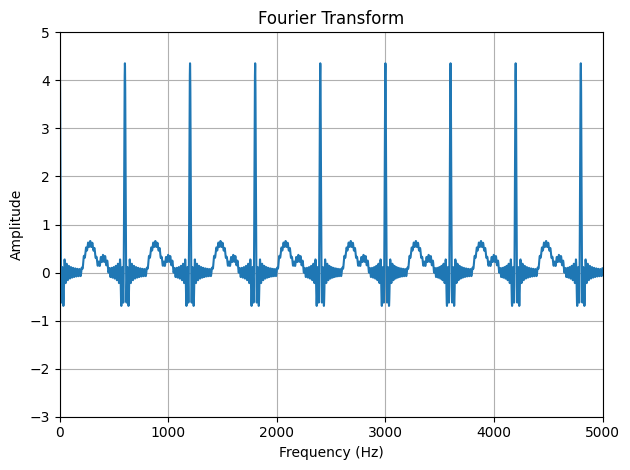

In [12]:

import numpy as np
from scipy.integrate import quad

def r_wave(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*(x))/(period) + amp
        
    R_a0, _ = quad(a0, 0, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,0)
    R_a0 = 1/300*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/800)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1,0)
    c = -1
    R1_an = []
    R1_an = aN(0, p2)
    a_N = 1/300*(R_an+R1_an)
    return a_N, R_a0

def s_wave(n, b, amp, period, p1, p2, c2):
    
    f1 = lambda x : ((-1*b*amp*(x))/(period) + amp)
    f2 = lambda x : ((b*amp*(x+c2))/(period) + amp)
      
    R_a0, _ = quad(f1 ,20, 30)#p1, (p2/2)+(p1/2))
    R1_a0, _ = quad(f2 , 30, 40)#(p2/2)+(p1/2),p2)
    R_a0 = (1/300)*(R_a0+R1_a0)
    
    
    
    def aN(low, high, f):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f3 = lambda x : (f(x))*np.cos((i*np.pi*x)/300)
            arr[i-1], _ = quad(f3, low, high)
        return arr
    
    R1_an = aN(20,30, f1)#p1, (p2/2)+(p1/2))
    R_an = aN(30,40, f2)#(p2/2)+(p1/2),p2)

    
    a_N = (1/300)*(R_an+R1_an)
    return a_N, R_a0
    


def T_wave(n, low, high, amp, c1):
    def a0(x):
        return -0.00009375 * ((x + c1)**2) + amp
    T_a0, _ = quad(a0, a=low, b=high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (-9.375e-5 * ((x + c1)**2) + amp)*(np.cos((i*np.pi*x)/(300)))
            arr[i-1], _ = quad(f, a=low, b=high)
        return arr
    
    def bN():
        arr = np.zeros(n)
        for i in range(1, n + 1):
            f = lambda x: (-(9.375e-5 * (x + c1)**2) + amp) * np.sin((i * np.pi * x) / 300)
            arr[i - 1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/300)
    T_aN = aN()*(1/300)
    T_bN = bN()*(1/300)
    return T_aN, T_a0, T_bN


def fourier():
    #R-WAVE
    n, b, amp, p1, p2 = 30, 2, 2.5, -20, 20
    R_an, R_a0 = r_wave(n,b,amp, p1,p2)
    #Q_an, Q_a0 = coefficients(n, b, amp, 20, 40, -60)
    S_an, S_a0 = s_wave(n, b, amp, abs(p1)+abs(p2), 20, 40, -60)
    T_an, T_a0, T_bn = T_wave(n, 200, 360, .6,-280)
    P_an, P_a0, P_bn = T_wave(n, -260, -143, .3, 200)
    #R_an +=  Q_an + S_an  
    R_a0 +=  T_a0 + S_a0 + P_a0
    
    x = np.arange(-10000, 10000, 1)
    
    y = np.zeros(len(x))
    for j in range (len(x)):
        for i in range(1,n+1):
            y[j] +=  (np.cos((np.pi*i*x[j])/300) * T_an[i-1]) + (np.sin((np.pi*i*x[j])/300) * T_bn[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/300) * R_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/300) * S_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/300) * P_an[i-1]) + (np.sin((np.pi*i*x[j])/300) * P_bn[i-1])
        y[j] += (R_a0/2)
    return x, y

x, y = fourier()
plt.plot(x, y)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-3, 5)
plt.xlim(0, 5000) 
plt.tight_layout()
plt.show()

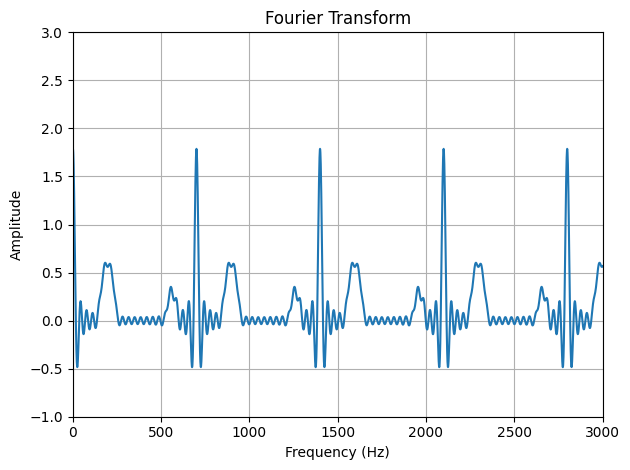

In [11]:

import numpy as np
from scipy.integrate import quad

def r_wave(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*(x))/(period) + amp
        
    R_a0, _ = quad(a0, 0, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,0)
    R_a0 = 1/500*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1,0)
    c = -1
    R1_an = []
    R1_an = aN(0, p2)
    a_N = 1/500*(R_an+R1_an)
    return a_N, R_a0

def s_wave(n, b, amp, period, p1, p2, c2):
    
    f1 = lambda x : ((-1*b*amp*(x))/(period) + amp)
    f2 = lambda x : ((b*amp*(x+c2))/(period) + amp)
      
    R_a0, _ = quad(f1 ,20, 30)#p1, (p2/2)+(p1/2))
    R1_a0, _ = quad(f2 , 30, 40)#(p2/2)+(p1/2),p2)
    R_a0 = (1/500)*(R_a0+R1_a0)
    
    
    
    def aN(low, high, f):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f3 = lambda x : (f(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f3, low, high)
        return arr
    
    R1_an = aN(20,30, f1)#p1, (p2/2)+(p1/2))
    R_an = aN(30,40, f2)#(p2/2)+(p1/2),p2)

    
    a_N = (1/500)*(R_an+R1_an)
    return a_N, R_a0
    


def T_wave(n, low, high, amp, c1):
    def a0(x):
        return -0.00009375 * ((x + c1)**2) + amp
    T_a0, _ = quad(a0, a=low, b=high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (-9.375e-5 * ((x + c1)**2) + amp)*(np.cos((i*np.pi*x)/(500)))
            arr[i-1], _ = quad(f, a=low, b=high)
        return arr
    
    def bN():
        arr = np.zeros(n)
        for i in range(1, n + 1):
            f = lambda x: (-(9.375e-5 * (x + c1)**2) + amp) * np.sin((i * np.pi * x) / 500)
            arr[i - 1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/500)
    T_aN = aN()*(1/500)
    T_bN = bN()*(1/500)
    return T_aN, T_a0, T_bN


def fourier():
    #R-WAVE
    n, b, amp, p1, p2 = 20, 2, 2.5, -20, 20
    R_an, R_a0 = r_wave(n,b,amp, p1,p2)
    #Q_an, Q_a0 = coefficients(n, b, amp, 20, 40, -60)
    S_an, S_a0 = s_wave(n, b, amp, abs(p1)+abs(p2), 20, 40, -60)
    T_an, T_a0, T_bn = T_wave(n, 200, 360, .6,-280)
    P_an, P_a0, P_bn = T_wave(n, -260, -143, .3, 200)
    #R_an +=  Q_an + S_an  
    R_a0 +=  T_a0 + S_a0 + P_a0
    
    x = np.arange(-10000, 10000, 1)
    
    y = np.zeros(len(x))
    for j in range (len(x)):
        for i in range(1,n+1):
            y[j] +=  (np.cos((np.pi*i*x[j])/350) * T_an[i-1]) + (np.sin((np.pi*i*x[j])/350) * T_bn[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/350) * R_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/350) * S_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/350) * P_an[i-1]) + (np.sin((np.pi*i*x[j])/350) * P_bn[i-1])
        y[j] += (R_a0/2)
    return x, y

x, y = fourier()
plt.plot(x, y)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-1, 3)
plt.xlim(0, 3000) 
plt.tight_layout()
plt.show()

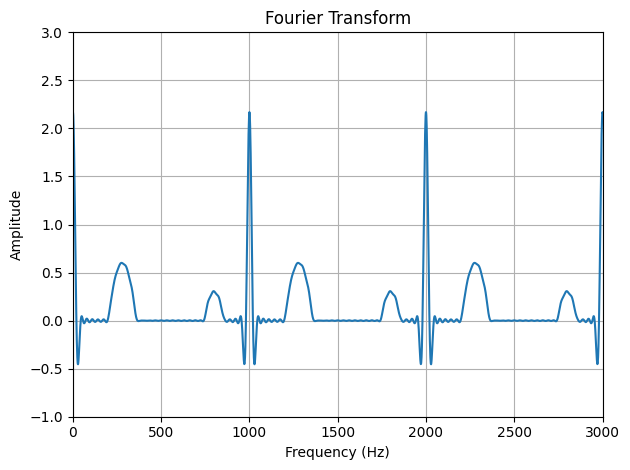

In [16]:

import numpy as np
from scipy.integrate import quad

def r_wave(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*(x))/(period) + amp
        
    R_a0, _ = quad(a0, 0, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,0)
    R_a0 = 1/500*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1,0)
    c = -1
    R1_an = []
    R1_an = aN(0, p2)
    a_N = 1/500*(R_an+R1_an)
    return a_N, R_a0

def s_wave(n, b, amp, period, p1, p2, c2):
    
    f1 = lambda x : ((-1*b*amp*(x))/(period) + amp)
    f2 = lambda x : ((b*amp*(x+c2))/(period) + amp)
      
    R_a0, _ = quad(f1 ,20, 30)#p1, (p2/2)+(p1/2))
    R1_a0, _ = quad(f2 , 30, 40)#(p2/2)+(p1/2),p2)
    R_a0 = (1/500)*(R_a0+R1_a0)
    
    
    
    def aN(low, high, f):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f3 = lambda x : (f(x))*np.cos((i*np.pi*x)/500)
            arr[i-1], _ = quad(f3, low, high)
        return arr
    
    R1_an = aN(20,30, f1)#p1, (p2/2)+(p1/2))
    R_an = aN(30,40, f2)#(p2/2)+(p1/2),p2)

    
    a_N = (1/500)*(R_an+R1_an)
    return a_N, R_a0
    


def T_wave(n, low, high, amp, c1):
    def a0(x):
        return -0.00009375 * ((x + c1)**2) + amp
    T_a0, _ = quad(a0, a=low, b=high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (-9.375e-5 * ((x + c1)**2) + amp)*(np.cos((i*np.pi*x)/(500)))
            arr[i-1], _ = quad(f, a=low, b=high)
        return arr
    
    def bN():
        arr = np.zeros(n)
        for i in range(1, n + 1):
            f = lambda x: (-(9.375e-5 * (x + c1)**2) + amp) * np.sin((i * np.pi * x) / 500)
            arr[i - 1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/500)
    T_aN = aN()*(1/500)
    T_bN = bN()*(1/500)
    return T_aN, T_a0, T_bN


def fourier():
    #R-WAVE
    n, b, amp, p1, p2 = 30, 2, 2.5, -20, 20
    R_an, R_a0 = r_wave(n,b,amp, p1,p2)
    #Q_an, Q_a0 = coefficients(n, b, amp, 20, 40, -60)
    S_an, S_a0 = s_wave(n, b, amp, abs(p1)+abs(p2), 20, 40, -60)
    T_an, T_a0, T_bn = T_wave(n, 200, 360, .6,-280)
    P_an, P_a0, P_bn = T_wave(n, -260, -143, .3, 200)
    #R_an +=  Q_an + S_an  
    R_a0 +=  T_a0 + S_a0 + P_a0
    
    x = np.arange(-10000, 10000, 1)
    
    y = np.zeros(len(x))
    for j in range (len(x)):
        for i in range(1,n+1):
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * T_an[i-1]) + (np.sin((np.pi*i*x[j])/500) * T_bn[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * R_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * S_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/500) * P_an[i-1]) + (np.sin((np.pi*i*x[j])/500) * P_bn[i-1])
        y[j] += (R_a0/2)
    return x, y

x, y = fourier()
plt.plot(x, y)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-1, 3)
plt.xlim(0, 3000) 
plt.tight_layout()
plt.show()


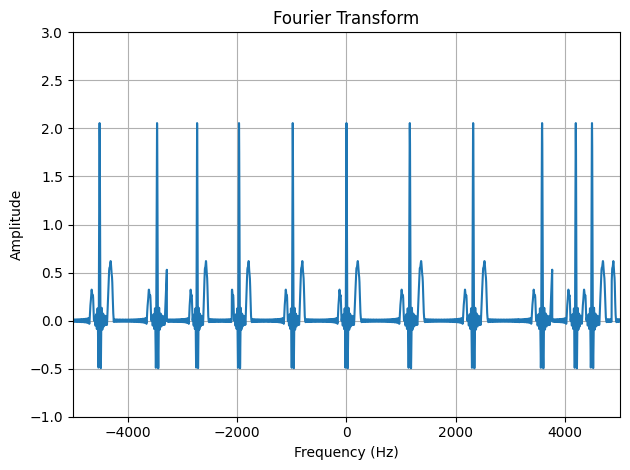

In [26]:

import numpy as np
from scipy.integrate import quad
import random

def r_wave(n,b,amp, p1,p2):
    period = abs(p1)+abs(p2)
    c = -1
    def a0(x):
        return (c*b*amp*(x))/(period) + amp
        
    R_a0, _ = quad(a0, 0, p2)
    c = 1
    R1_a0, _ = quad(a0,p1,0)
    R_a0 = 1/800*(R_a0+R1_a0)
    
    
    
    def aN(low, high):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (a0(x))*np.cos((i*np.pi*x)/800)
            arr[i-1], _ = quad(f, low, high)
        return arr
    
    R_an = []
    R_an = aN(p1,0)
    c = -1
    R1_an = []
    R1_an = aN(0, p2)
    a_N = 1/800*(R_an+R1_an)
    return a_N, R_a0

def s_wave(n, b, amp, period, p1, p2, c2):
    
    f1 = lambda x : ((-1*b*amp*(x))/(period) + amp)
    f2 = lambda x : ((b*amp*(x+c2))/(period) + amp)
      
    R_a0, _ = quad(f1 ,20, 30)#p1, (p2/2)+(p1/2))
    R1_a0, _ = quad(f2 , 30, 40)#(p2/2)+(p1/2),p2)
    R_a0 = (1/800)*(R_a0+R1_a0)
    
    
    
    def aN(low, high, f):
        arr = np.zeros((n))
        for i in range(1,n+1):
            f3 = lambda x : (f(x))*np.cos((i*np.pi*x)/800)
            arr[i-1], _ = quad(f3, low, high)
        return arr
    
    R1_an = aN(20,30, f1)#p1, (p2/2)+(p1/2))
    R_an = aN(30,40, f2)#(p2/2)+(p1/2),p2)

    
    a_N = (1/800)*(R_an+R1_an)
    return a_N, R_a0
    


def T_wave(n, low, high, amp, c1):
    def a0(x):
        return -0.00009375 * ((x + c1)**2) + amp
    T_a0, _ = quad(a0, a=low, b=high)
    
    def aN():
        arr = np.zeros((n))
        for i in range(1,n+1):
            f = lambda x : (-9.375e-5 * ((x + c1)**2) + amp)*(np.cos((i*np.pi*x)/(800)))
            arr[i-1], _ = quad(f, a=low, b=high)
        return arr
    
    def bN():
        arr = np.zeros(n)
        for i in range(1, n + 1):
            f = lambda x: (-(9.375e-5 * (x + c1)**2) + amp) * np.sin((i * np.pi * x) / 800)
            arr[i - 1], _ = quad(f, low, high)
        return arr
    T_a0 = T_a0 * (1/800)
    T_aN = aN()*(1/800)
    T_bN = bN()*(1/800)
    return T_aN, T_a0, T_bN


def fourier():
    #R-WAVE
    n, b, amp, p1, p2 = 40, 2, 2.5, -20, 20
    R_an, R_a0 = r_wave(n,b,amp, p1,p2)
    #Q_an, Q_a0 = coefficients(n, b, amp, 20, 40, -60)
    S_an, S_a0 = s_wave(n, b, amp, abs(p1)+abs(p2), 20, 40, -60)
    T_an, T_a0, T_bn = T_wave(n, 200, 360, .6,-280)
    P_an, P_a0, P_bn = T_wave(n, -260, -143, .3, 200)
    #R_an +=  Q_an + S_an  
    R_a0 +=  T_a0 + S_a0 + P_a0
    
    x = np.arange(-5000, 5000, 1)
    ran = random.uniform(1, 1.2)
    p = 500
    prev = 0
    y = np.zeros(len(x))
    for j in range (len(x)):
        if x[j] % (p+prev) == 0:
            prev += p
            p = random.randint(400,600)
        for i in range(1,n+1):
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * T_an[i-1]) + (np.sin((np.pi*i*x[j])/p) * T_bn[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * R_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * S_an[i-1])
            y[j] +=  (np.cos((np.pi*i*x[j])/p) * P_an[i-1]) + (np.sin((np.pi*i*x[j])/p) * P_bn[i-1])
        y[j] += (R_a0/2)
    return x, y

x, y = fourier()
plt.plot(x, y)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-1, 3)
plt.xlim(-5000, 5000) 
plt.tight_layout()
plt.show()